In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import matplotlib.font_manager as fm
import yfinance as yf
import datetime
from datetime import timedelta, datetime
import openpyxl

In [2]:
dfSEMANAL = pd.read_excel('BASE_SEMANAL.xlsx')

In [10]:
dfCOMPRA = dfSEMANAL.query('OPERAÇÃO == "Compra"')
dfVENDA = dfSEMANAL.query('OPERAÇÃO == "Venda"')

In [11]:
dfCOMPRA_final = dfCOMPRA.groupby(['DOCUMENTO'], as_index=False).agg({'DOCUMENTO':'first',
                                                                      'NOME':'first',
                                                                      'PF_PJ':'first',
                                                                      'TOTAL':'first',
                                                                      'TOTAL_NOVO':'last',
                                                                      'VAR_COTAS':'sum',
                                                                      'OPERAÇÃO':'first',
                                                                      'FINANCEIRO_ATUAL':'first',
                                                                      'FINANCEIRO_NOVO':'last',
                                                                      'VAR_PRECO':'sum',
                                                                      'CATEGORIAS ATUAIS':'last',
                                                                      'CATEGORIAS ANTIGAS':'first',
                                                                      'Participação_sup':'sum',
                                                                      'ENTRADA_GARE15':'first',
                                                                      'ENTRADA_GALG15':'first',
                                                                      'DATA':'first',
                                                                      'CATEGORIAS':'first'})

dfVENDA_final = dfVENDA.groupby(['DOCUMENTO'], as_index=False).agg({'DOCUMENTO':'first',
                                                                      'NOME':'first',
                                                                      'PF_PJ':'first',
                                                                      'TOTAL':'first',
                                                                      'TOTAL_NOVO':'last',
                                                                      'VAR_COTAS':'sum',
                                                                      'OPERAÇÃO':'first',
                                                                      'FINANCEIRO_ATUAL':'first',
                                                                      'FINANCEIRO_NOVO':'last',
                                                                      'VAR_PRECO':'sum',
                                                                      'CATEGORIAS ATUAIS':'last',
                                                                      'CATEGORIAS ANTIGAS':'first',
                                                                      'Participação_sup':'sum',
                                                                      'ENTRADA_GARE15':'first',
                                                                      'ENTRADA_GALG15':'first',
                                                                      'DATA':'first',
                                                                      'CATEGORIAS':'first'})

In [12]:
total_compra = dfCOMPRA['VAR_PRECO'].sum()
total_venda = dfVENDA['VAR_PRECO'].sum()
delta_sum = total_compra+total_venda
print('o valor de compra é {} e o valor de venda é {}, e o total é {}'.format(total_compra, total_venda, delta_sum))

o valor de compra é 33466067.16 e o valor de venda é 33466067.159999996, e o total é 66932134.31999999


In [13]:
dfCOMPRA_final['Participação_sup'] = (dfCOMPRA_final['VAR_PRECO']/total_compra)*100
dfCOMPRA_final['Participação_sup'].sum()

np.float64(100.0)

In [14]:
dfVENDA_final['Participação_sup'] = (dfVENDA_final['VAR_PRECO']/total_venda)*100
dfVENDA_final['Participação_sup'].sum()

np.float64(100.00000000000003)

In [ ]:
dfCOMPRA_final

In [15]:
plim = dfCOMPRA_final.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

plim.set_index('CATEGORIAS')

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(str)

plim['OPERAÇÃO_PF_PJ'] = plim['OPERAÇÃO'] + ' ' + plim['PF_PJ']

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PF", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PJ", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['% PARTICIPAÇÃO'] = ((plim['VAR_PRECO']/(total_compra))*100).round(2)

mapeamento = {'1': '0-1k', '2':'1k-5k', '3':'5k-20k', '4':'20k-50k', '5':'50k-100k', '6':'100k-500k', '7':'500k-1M', '8':'1M-3M', '9':'3M-15M','10':'>15M'}

plim['CLASSE_CATEGORIA'] = plim['CATEGORIAS'].map(mapeamento)

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(int)

plim = plim.sort_values(by='CATEGORIAS')

plim['VAR_PRECO'].astype(float)

plim['VAR_PRECO'] = plim['VAR_PRECO'].round(2)

plim

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Compra,PF,4132930.86,Compra PF,12.35,0-1k
1,1,Compra,PJ,2964.01,Compra PJ,0.01,0-1k
2,2,Compra,PF,5261564.87,Compra PF,15.72,1k-5k
3,2,Compra,PJ,4852.69,Compra PJ,0.01,1k-5k
4,3,Compra,PF,5604699.27,Compra PF,16.75,5k-20k
5,3,Compra,PJ,22494.46,Compra PJ,0.07,5k-20k
6,4,Compra,PF,2238086.52,Compra PF,6.69,20k-50k
7,4,Compra,PJ,315859.45,Compra PJ,0.94,20k-50k
8,5,Compra,PF,1912314.75,Compra PF,5.71,50k-100k
9,5,Compra,PJ,295205.63,Compra PJ,0.88,50k-100k


In [16]:
v = dfVENDA_final.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

v.set_index('CATEGORIAS')

v['CATEGORIAS'] = v['CATEGORIAS'].astype(str)

v['OPERAÇÃO_PF_PJ'] = v['OPERAÇÃO'] + ' ' + v['PF_PJ']

v['VAR_PRECO'] = np.where(v['OPERAÇÃO_PF_PJ'] == "Venda PF", 
                                                 v['VAR_PRECO']* -1,
                                                 v['VAR_PRECO'])

v['VAR_PRECO'] = np.where(v['OPERAÇÃO_PF_PJ'] == "Venda PJ", 
                                                 v['VAR_PRECO']* -1,
                                                 v['VAR_PRECO'])

v['% PARTICIPAÇÃO'] = ((v['VAR_PRECO']/(total_venda))*100).round(2)

mapeamento = {'1': '0-1k', '2':'1k-5k', '3':'5k-20k', '4':'20k-50k', '5':'50k-100k', '6':'100k-500k', '7':'500k-1M', '8':'1M-3M', '9':'3M-15M','10':'>15M'}

v['CLASSE_CATEGORIA'] = v['CATEGORIAS'].map(mapeamento)

v['CATEGORIAS'] = v['CATEGORIAS'].astype(int)

v = v.sort_values(by='CATEGORIAS')

v['VAR_PRECO'].astype(float)

v['VAR_PRECO'] = v['VAR_PRECO'].round(2)

v

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Venda,PF,-931643.43,Venda PF,-2.78,0-1k
1,1,Venda,PJ,-431.65,Venda PJ,-0.00,0-1k
2,2,Venda,PF,-2128776.89,Venda PF,-6.36,1k-5k
3,2,Venda,PJ,-15808.42,Venda PJ,-0.05,1k-5k
4,3,Venda,PF,-4002660.03,Venda PF,-11.96,5k-20k
5,3,Venda,PJ,-57639.31,Venda PJ,-0.17,5k-20k
6,4,Venda,PF,-4960234.72,Venda PF,-14.82,20k-50k
7,4,Venda,PJ,-37418.88,Venda PJ,-0.11,20k-50k
8,5,Venda,PF,-2534847.91,Venda PF,-7.57,50k-100k
9,5,Venda,PJ,-260398.26,Venda PJ,-0.78,50k-100k


C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_16908\1492811276.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(plim['CLASSE_CATEGORIA'].unique())


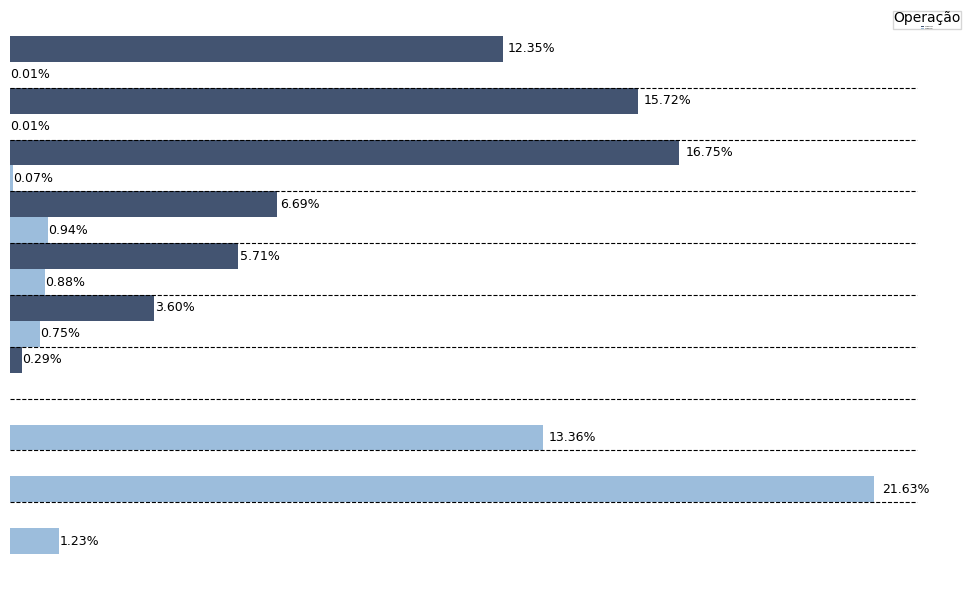

In [17]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=plim, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Compra PF': '#3B5279', 'Compra PJ': '#91BDE7','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(plim['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)


ax.set_yticklabels(plim['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            #fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='upper right', fontsize = 0.05)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('COMPRA_PF_E_PJ', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_16908\1108589480.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(v['CLASSE_CATEGORIA'].unique())


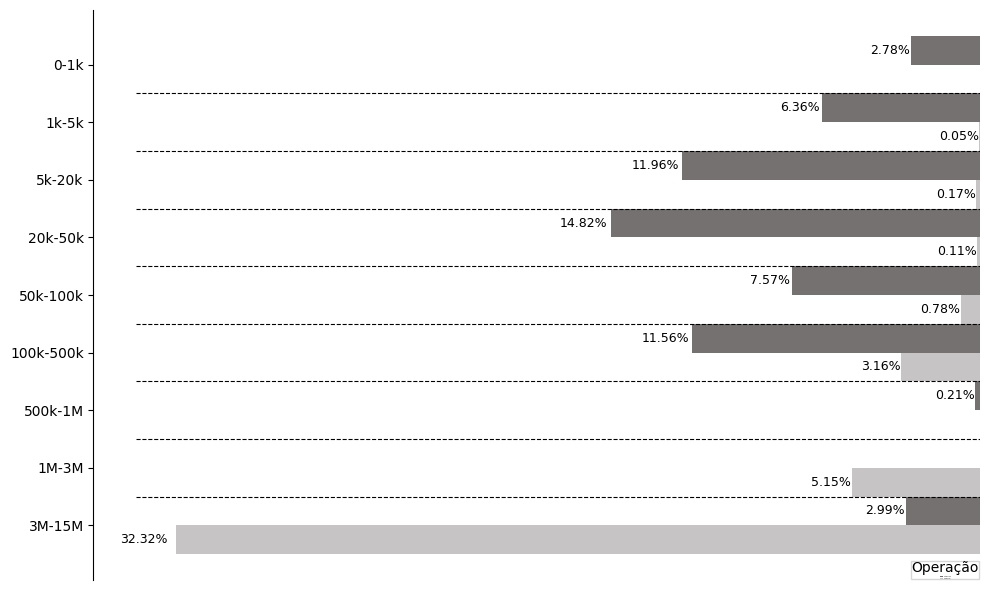

In [18]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=v, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Venda PF': '#767070', 'Venda PJ': '#C6C4C4','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(v['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)

#ax.vlines(x=0, ymin=-0.5, ymax=len(graf['CATEGORIAS'].unique()) - 0.5, color='black', linestyle='-', linewidth=1.5)

#ticks = [100000, 500000, 1000000, 2000000]
#ax.set_xticks(ticks)
#ax.set_xticklabels([f'R${x:,}' for x in ticks])
#ax.xaxis.set_tick_params(labelsize = (12))

#ax.set_yticks(range(len(ylabels)))
#ax.set_yticklabels(ylabels, fontsize=11, fontproperties = Avenir)
ax.set_yticklabels(v['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            #fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(True)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='lower right', fontsize = 1)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('VENDA_PF_E_PJ', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [21]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'
of = 'ENTRADA_GARE15'
of2 = 'ENTRADA_GALG15'

TOP10_Compra = dfCOMPRA_final[[Nome,cat,tipo,fin_mov,cat_atuais,of,of2]]

TOP10_Compra = TOP10_Compra.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Compra['VAR_PRECO'] = TOP10_Compra['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

TOP10_Compra = TOP10_Compra.set_index('NOME')

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Compra['CATEGORIAS'] = TOP10_Compra['CATEGORIAS'].map(mapear)

TOP10_Compra


,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS ATUAIS,ENTRADA_GARE15,ENTRADA_GALG15
NOME,,,,,,
KINEA HEDGE FUND FUNDO DE INVESTIMENTO IMOBILIARIO,1M-3M,PJ,4363174.61,1M-3M,AUSENTE,AUSENTE
CAPITANIA SECURITIES II FDO IN,3M-15M,PJ,3803096.64,3M-15M,AUSENTE,AUSENTE
LAZIO11 FUNDO DE INVESTIMENTO IMOBILIARIO RESP LIMITADA,3M-15M,PJ,3435065.28,3M-15M,AUSENTE,AUSENTE
MAXI RENDA FUNDO DE INVESTIMENTO IMOBILIARIO - FII,>15M,PJ,410000.00,>15M,AUSENTE,AUSENTE
MATHIAS HEINER ROTH,50k-100k,PF,336831.50,100k-500k,AUSENTE,AUSENTE
XTX MARKETS TRADING LIMITED,20k-50k,PJ,311539.45,100k-500k,AUSENTE,AUSENTE
CARLOS EDUARDO RODRIGUES GOMES,100k-500k,PF,172200.00,100k-500k,AUSENTE,AUSENTE
CASSIANO MOREIRA LOPES,20k-50k,PF,169982.80,100k-500k,AUSENTE,AUSENTE
RIGEL COVE LP,100k-500k,PJ,156873.60,100k-500k,AUSENTE,AUSENTE


In [23]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'
qtde = 'TOTAL_NOVO'

TOP10_Venda = dfVENDA_final[[Nome,cat,tipo,fin_mov, cat_atuais,of,of2]]

TOP10_Venda = TOP10_Venda.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Venda['VAR_PRECO'] = TOP10_Venda['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Venda['CATEGORIAS'] = TOP10_Venda['CATEGORIAS'].map(mapear)

TOP10_Venda['CATEGORIAS ATUAIS'] = TOP10_Venda['CATEGORIAS ATUAIS'].fillna('0-1k')

TOP10_Venda.set_index('NOME')

,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS ATUAIS,ENTRADA_GARE15,ENTRADA_GALG15
NOME,,,,,,
GGR COVEPI RENDA FII,3M-15M,PJ,3829635.28,100k-500k,AUSENTE,AUSENTE
CAPITANIA REIT MASTER CP FIC DE FIM,3M-15M,PJ,3375362.88,100k-500k,AUSENTE,AUSENTE
LAZIO11 FUNDO DE INVESTIMENTO IMOBILIARIO RESP LIMITADA,3M-15M,PJ,2082250.00,1M-3M,AUSENTE,AUSENTE
KINEA HEDGE FUND FUNDO DE INVESTIMENTO IMOBILIARIO,1M-3M,PJ,1723025.00,1M-3M,AUSENTE,AUSENTE
BB FUNDO DE FUNDOS - FUNDO DE INVESTIMENTO IMOBILIARIO,3M-15M,PJ,1528400.00,1M-3M,AUSENTE,AUSENTE
ARMEN YEGHIA ASDOURIAN,3M-15M,PF,1000218.65,1M-3M,AUSENTE,AUSENTE
XTX MARKETS TRADING LIMITED,100k-500k,PJ,448842.29,0-1k,AUSENTE,AUSENTE
MARIA JULIA DE OLIVEIRA SANTOS,100k-500k,PF,358340.00,0-1k,GARE15,GALG15
TAMIRES BONA,100k-500k,PF,320607.90,0-1k,AUSENTE,AUSENTE
